## 문제정의

In [1]:
import pandas as pd
import numpy as np
#위 두개는 안써도 습관적으로 import해보는 것이 좋다.

## 데이터 수집

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

## 데이터 전처리

데이터 전처리 할 건덕지가 없다.

## 탐색적 분석

In [4]:
iris.keys()
#data = train데이터 ,target = 정답값 ,
#feature_name=(특성명,칼럼명),
#filename = 파일의 위치

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['DESCR']
#DESCR: 이 데이터에 대한 설명을 주는 키

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris['data'].shape

(150, 4)

In [7]:
iris['target'].shape
#훈련시키는 데이터와 타겟 데이터의 갯수는 같아야한다.

(150,)

#### 데이터 프레임 변환

딕셔너리로 데이터를 넣으면 변환이 되지 않기 때문에 데이터 프레임변환 필요

In [9]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width']
#칼럼 이름 변경
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
df.describe()
#통계 요약

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
df.isnull().sum()
#결측치 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [18]:
df.duplicated().sum()
#중복 데이터 확인

1

In [20]:
df.drop_duplicates(inplace=True)
#.drop_duplicates(inplace=True):중복 데이터를 없애는 함수.
#괄호 안에 inplace가 없으면 보여줄때만 줄어들고 원본은 안줄어듬
#(원본을 줄이기 위해 괄호 안에 inplace 추가)

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
df.corr()
#.corr:변수간의 상관 계수 행렬을 출력하는 함수

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


## 데이터 시각화

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

<AxesSubplot:>

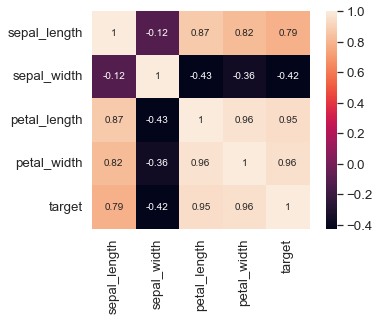

In [24]:
sns.heatmap(data=df.corr(),square=True,annot=True,cbar=True)
#히트맵 추가
#annot = 히트맵 안에 숫자 추가.

In [26]:
df['target'].value_counts()
#클래스의 갯수

0    50
1    50
2    49
Name: target, dtype: int64

(array([ 9., 23., 14., 27., 15., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

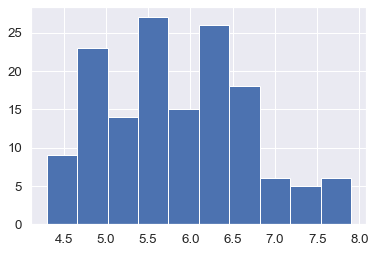

In [27]:
plt.hist(x='sepal_length',data=df)

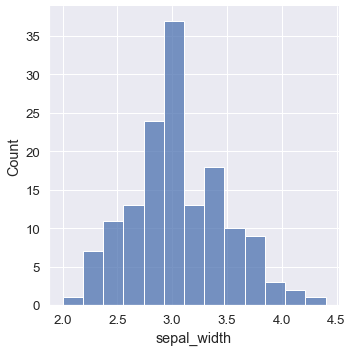

In [29]:
sns.displot(x='sepal_width',kind = 'hist',data=df)
#seaborn으로 히스토그램

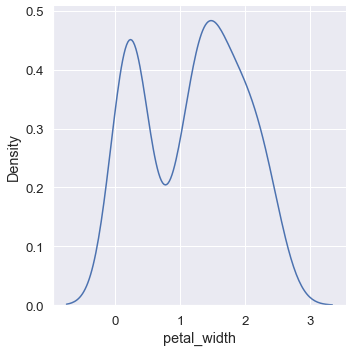

In [31]:
sns.displot(x='petal_width',kind='kde',data=df)
#밀도함수

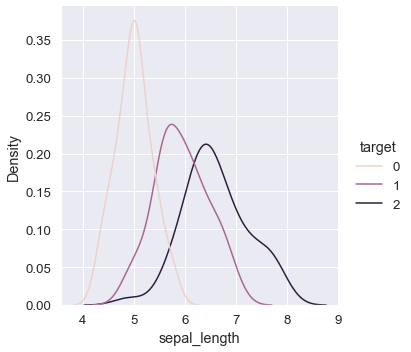

In [33]:
sns.displot(x='sepal_length',hue='target',kind='kde',data=df)
#클래스를 군집되는 데이터로 나누어서 이질적이지 않게 하나의 봉우리로 나옴

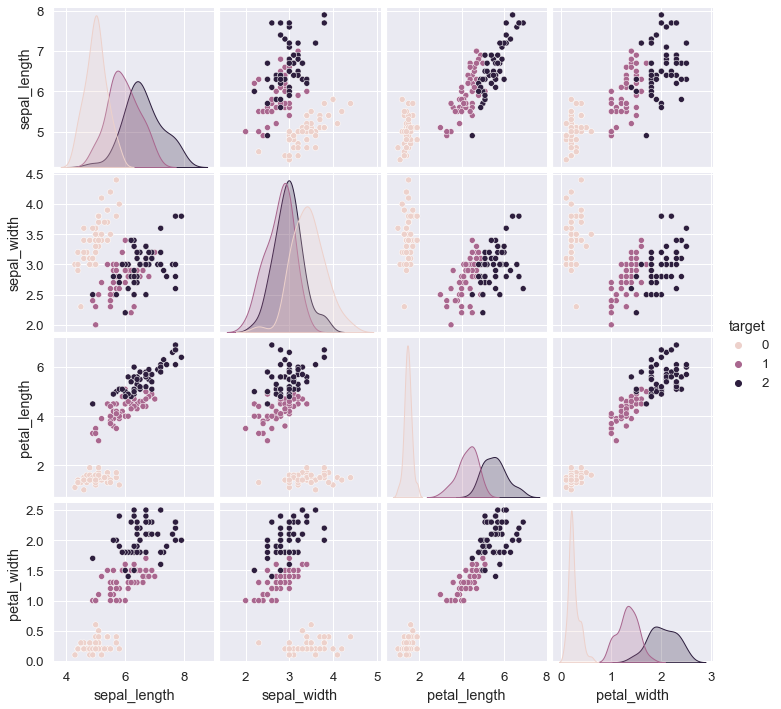

In [34]:
sns.pairplot(df, hue='target',height=2.5,diag_kind='kde')
#hue: ~기준으로 나눈다.
plt.show()

## 데이터셋 분할

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x=df.loc[:,'sepal_length':'petal_width']
y=df.loc[:,'target']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.3,
                                              shuffle=True,
                                              random_state=20)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#test_size 테스트 사이즈의 길이 조정 0~1 사이

(104, 4) (104,)
(45, 4) (45,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

### 모델 정의

In [44]:
model=KNeighborsClassifier(n_neighbors=3)

### 모델 학습

In [45]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 예측

In [56]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

### 모델 평가

In [55]:
model.score(x_test,y_test)

0.9333333333333333

In [57]:
from sklearn.metrics import accuracy_score
#정확도 확인을 위한 import

In [60]:
acc = accuracy_score(y_test,pred)
print('Accuraccy:',acc)
#knn분류 모델에서 model.score와 accuract_score의 결과값은 같다.

Accuraccy: 0.9333333333333333
